<a href="https://colab.research.google.com/github/Glitch0110/AI-GiganciProgramowania/blob/main/L11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

wzór y = 8313.101956732871x + 584.4932450348139


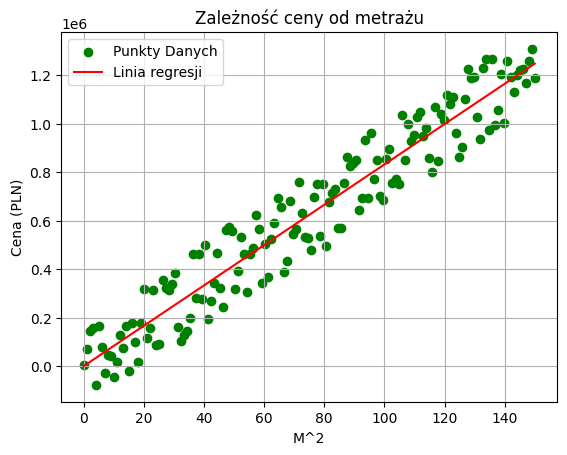

In [47]:
from numpy.random.mtrand import randint
def regression(x,y):
  sum_of_xy = 0
  sum_x = 0
  sum_y = 0
  sum_x_squared = 0
  n = len(x)

  for x_value, y_value in zip(x,y):
    sum_of_xy += x_value * y_value
    sum_x += x_value
    sum_y += y_value
    sum_x_squared += x_value ** 2


  a = (n*sum_of_xy - sum_x * sum_y) / (n*sum_x_squared - sum_x ** 2)
  b = (sum_y - a * sum_x) / n

  print(f"wzór y = {a}x + {b}")
  return a, b
#np.random.seed(42)
X = np.linspace(0, 150, 150)
noise = np.random.randint(-175000, 175000, 150)
Y = 8300 * X + 3 + noise

a, b = regression(X, Y)
Y_pred = a * X + b

plt.scatter(X, Y, color="green", label="Punkty Danych")
plt.plot(X, Y_pred, color='red', label="Linia regresji")
plt.xlabel("M^2")
plt.ylabel("Cena (PLN)")
plt.grid(True)
plt.legend()
plt.title("Zależność ceny od metrażu")
plt.show()